# Time Series Project
## CodeUp Data Science | April 2022

#### For this project you will be analyzing data from a superstore. The project is open ended and you can choose the direction you want to take it based on the paths outlined below.


<hr>

## SPEC:

#### __VP of Product:__ 

   - ##### Which product line should we expand?

   - ##### Is there a product category that is particularly profitable for us? Does one or another stand out in terms of sales volume? Does this vary by customer segment?



### Import libraries

In [105]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Stephen's files
import acquire 
import prepare
from acquire import get_superstore_data
from prepare import prepare_superstore_data

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt


# plotting defaults
plt.rc('figure', figsize=(16, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


# Acquire Raw Data (from acquire.py)

In [2]:
# Call the acquire function directly

df = get_superstore_data()
df.head(1)

Reading csv file..


,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South


In [3]:
# Data Description

df.describe()

,Region ID,Category ID,Postal Code,Sales,Quantity,Discount,Profit
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2.722607,8.106113,53501.926182,229.206358,3.794694,0.160110,21.880351
std,1.062277,3.480593,32180.245224,532.862614,2.297407,0.206419,202.891949
min,1.000000,1.000000,1841.000000,1.080000,1.000000,0.000000,-3839.990400
25%,2.000000,6.000000,19143.000000,16.695000,2.000000,0.000000,1.702400
50%,3.000000,8.000000,50315.000000,52.245000,3.000000,0.200000,8.073050
75%,4.000000,11.000000,85705.000000,209.917500,5.000000,0.200000,27.414450
max,4.000000,17.000000,98661.000000,8159.952000,14.000000,0.800000,3177.475000


In [4]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Product ID     1734 non-null   object 
 2   Customer ID    1734 non-null   object 
 3   Category ID    1734 non-null   int64  
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Category       1734 non-null   object 
 18  Sub-Cate

# Prepare Data

In [5]:
df = prepare_superstore_data()
df.head()

Reading csv file..


,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_category,customer_name,product_name,region_name
order_date,,,,,,,,,,,,,,,,,
2014-01-04,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
2014-01-04,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South
2014-01-04,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
2014-01-09,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
2014-01-09,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [6]:
# Order & ship date ranges

print(f'Order Date: \n\t Min: {df.order_date.min()} Max: {df.order_date.max()}')
print(f'\nShip Date: \n\t Min: {df.ship_date.min()} Max: {df.ship_date.max()}')

Order Date: 
	 Min: 2014-01-04 00:00:00 Max: 2017-12-30 00:00:00

Ship Date: 
	 Min: 2014-01-08 00:00:00 Max: 2018-01-05 00:00:00


In [7]:
# Columns 

df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'sales', 'quantity', 'discount', 'profit',
       'category', 'sub_category', 'customer_name', 'product_name',
       'region_name'],
      dtype='object')

In [8]:
# Customer segments 

df.segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### Check For nulls in entire DF

In [9]:
df.isna().any()

order_date       False
ship_date        False
ship_mode        False
segment          False
country          False
city             False
state            False
postal_code      False
sales            False
quantity         False
discount         False
profit           False
category         False
sub_category     False
customer_name    False
product_name     False
region_name      False
dtype: bool

### Initial Key Take-aways

- No need for __region_id, category_id column, order_id__  
- Should we need category_id, convert data type to int64
- Ship and order dates have varied end dates. 
- Df contains no nulls values 

# Exploration

## Initial questions?

- Which product(s) is most profitable and which are under-performing?
- What is the disparity in sales volumes?
- Is there variations in customer segments: 
    - Consumer ?
    - Corporate ?
    - Home Office?
- What category is the most and least profitable?
- How is the order date and ship dates play in any or all of these features?
    - Is shipping mode a factor to consider?
- Do regions disparity affect the sales volumes and profit margins?

## Split the data into train, validate, test

In [42]:
# Create a function to split data

train = df.loc['2014':'2015']
validate = df.loc['2016']
test = df.loc['2017']

### Verify Splits 

In [20]:
train.head(1)

,order_date,ship_date,ship_mode,segment,country,city,state,postal_code,sales,quantity,discount,profit,category,sub_category,customer_name,product_name,region_name
order_date,,,,,,,,,,,,,,,,,
2014-01-04,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.96,2.0,0.0,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South


## (i) Is there a product category that is particularly profitable for us? 

<AxesSubplot:>

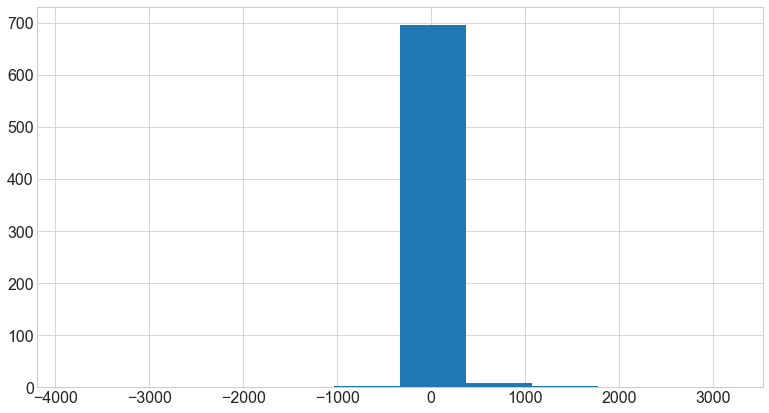

In [33]:
# Profit distribution

train.profit.hist()

<AxesSubplot:>

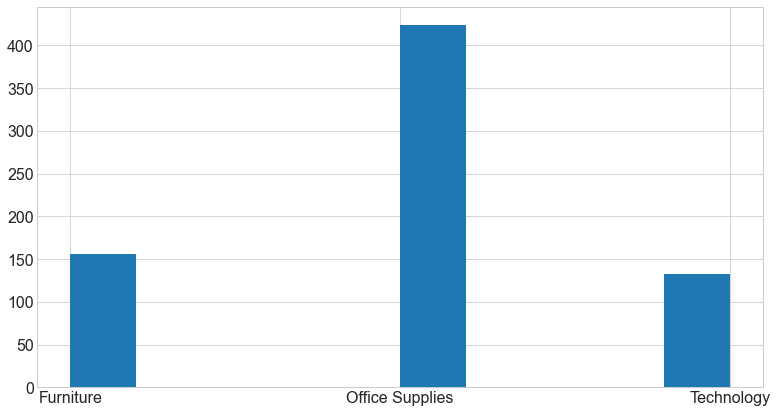

In [77]:
#  Product Categories

train.category.hist()

In [123]:
furniture_profit = train[train.category == 'Furniture'].profit
office_supply_profit = train[train.category == 'Office Supplies'].profit
technology_profit = train[train.category == 'Technology'].profit
print(f'Furniture: {furniture_profit.mean()} \nOffice Suppply: {office_supply_profit.mean()} \nTechnology: {technology_profit.mean()}')


Furniture: 14.840043589743587 
Office Suppply: 27.676843867924497 
Technology: 61.888798484848486


In [168]:
# Assign the y variable to target variable (category)

y = train.profit

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='order_date'>

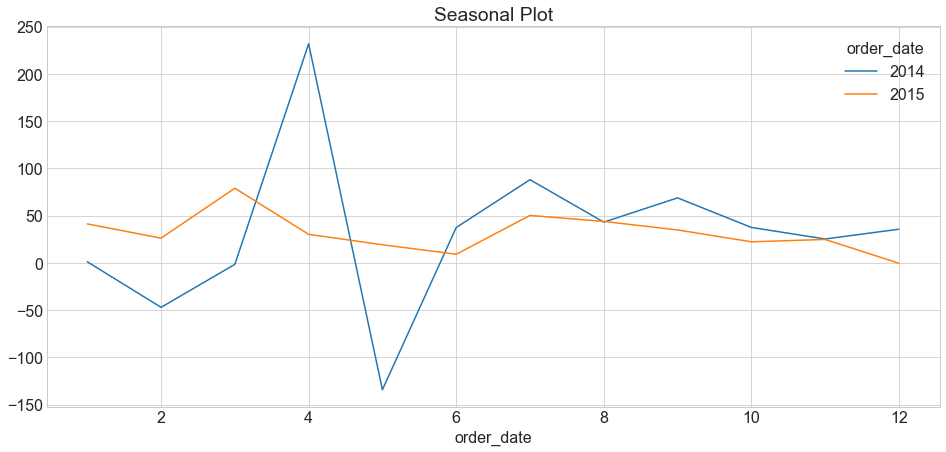

In [169]:
# Profit variations over time

y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Categories Profit over time

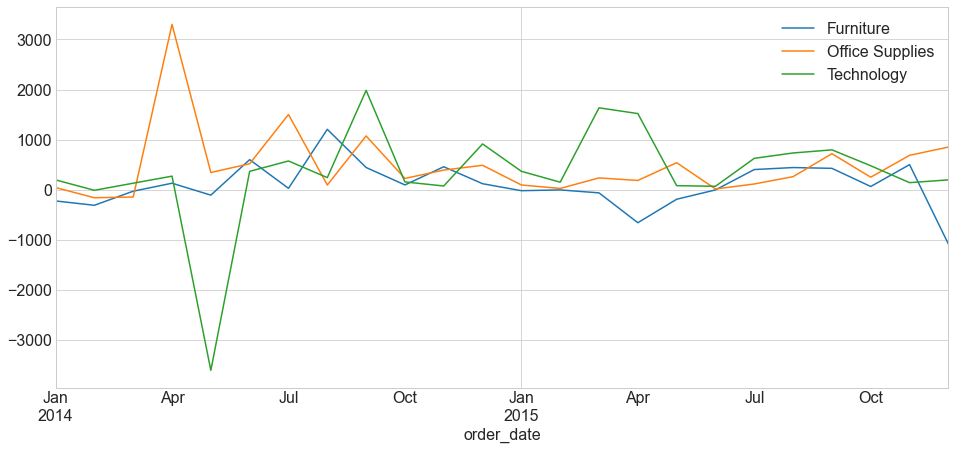

In [128]:
# Profit of categories over time 

for cat in train.category.unique():
    sample = train[train.category == cat]
    sample.resample('M').profit.sum().plot(label = cat)
    plt.legend()
    

### Most profitable category

In [127]:
group = train.groupby(["category"]).sum()
total_price = group["profit"].groupby(level=0, group_keys=False)
total_price.nlargest(5)

category
Furniture           2315.0468
Office Supplies    11734.9818
Technology          8169.3214
Name: profit, dtype: float64

### T-Test (ANOVA)


In [146]:
from scipy import stats


H0 = 'The mean  profit of furniture, office supplies and technology are equal'
H1 = 'The mean  profit of furniture, office supplies and technology not equal'

# Set alpha level
alpha = 0.05

# Check variance 
print(f'Furniture Var: {furniture_profit.var()}')
print(f'Office Supply Var: {office_supply_profit.var()}')
print(f'Technology Var: {technology_profit.var()}')

Furniture Var: 18532.807466163507
Office Supply Var: 29108.39724017579
Technology Var: 160163.25780033568


In [147]:
f, p = stats.f_oneway(furniture_profit, office_supply_profit, technology_profit)
f, p

(1.6793811894802144, 0.1872303088064291)

In [153]:
if p < alpha:
    
    print(f"We reject:-- {HO}")
    
else:
    
    print(f"We fail to reject:-- {H0}")


We fail to reject:-- The mean  profit of furniture, office supplies and technology are equal


### Take aways (category):
- Overall most profitable category is the office supplies then technology and lastly furniture 
- Office supplies appears to spiked profit in Aplril of 2014
- Tecnology dipped in profit around May 2014
- ANOVA t-test failed to reject mean profit different

### Which sub-category are the most profitable?

In [160]:
# Get sub categories

train.sub_category.unique()

array(['Bookcases', 'Chairs', 'Tables', 'Storage', 'Paper', 'Furnishings',
       'Appliances', 'Binders', 'Envelopes', 'Accessories', 'Phones',
       'Art', 'Supplies', 'Labels', 'Fasteners', 'Machines', 'Copiers'],
      dtype=object)

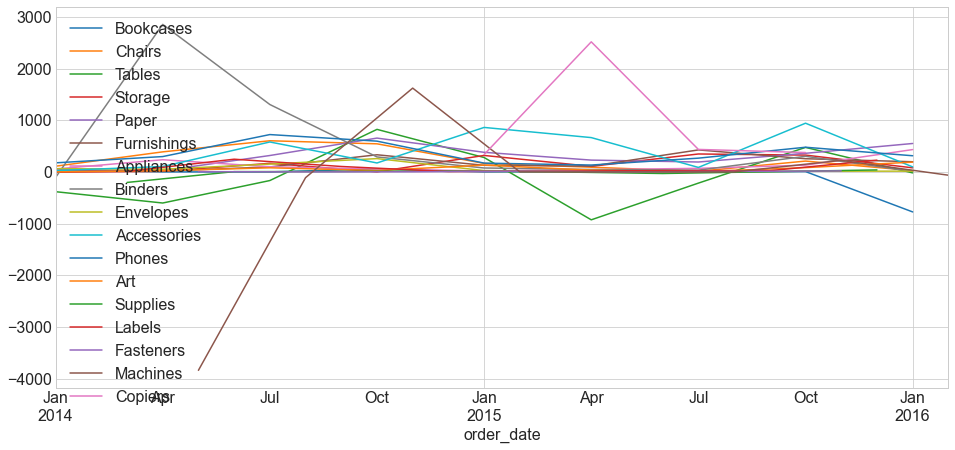

In [170]:
# Sub-category profit every 3 months 

for cat in train.sub_category.unique():
    sample = train[train.sub_category == cat]
    sample.resample('3M').profit.sum().plot(label = cat)
    plt.legend()

### One Sample T-test (sub-categories)

#### Which is the most profitable sub-categories?


In [200]:
train.sub_category.value_counts()

Binders        107
Paper           97
Furnishings     67
Phones          63
Storage         62
Art             58
Accessories     56
Chairs          47
Tables          32
Appliances      29
Labels          26
Envelopes       22
Supplies        12
Fasteners       11
Bookcases       10
Machines         7
Copiers          6
Name: sub_category, dtype: int64

<AxesSubplot:>

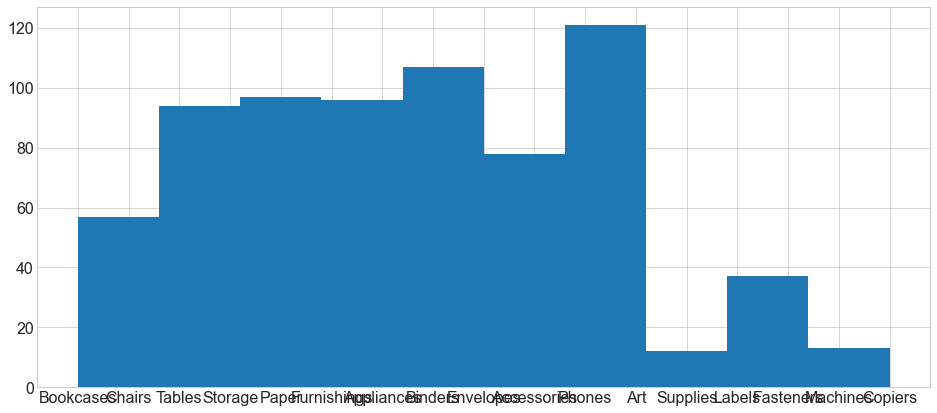

In [209]:
# Distribution of subcategories appears somewhat normal

train.sub_category.hist()

array(['Bookcases', 'Chairs', 'Tables', 'Storage', 'Paper', 'Furnishings',
       'Appliances', 'Binders', 'Envelopes', 'Accessories', 'Phones',
       'Art', 'Supplies', 'Labels', 'Fasteners', 'Machines', 'Copiers'],
      dtype=object)

In [231]:
# Set alpha 
alpha = 0.05

H0 =  'Mean sub-category profits = Mean profit of all customers'
H1 = 'Mean sub-category profits > Mean profit of all customers'

# Compute overall profit mean
overall_profit_mean = train.profit.mean()

# t, p = stats.ttest_1samp(books_profit, overall_profit_mean)
# t, p

for cat in train.sub_category.unique():
    
    sub_cat_profit = train[train.sub_category == cat]
    
    t, p = stats.ttest_1samp(sub_cat_profit.profit, overall_profit_mean)
    
    print('\n',cat)
    
    print('\t',t, p / 2, alpha,)

    if p/2 > alpha:
        
        print('We fail to reject {HO}')
    elif t < 0:
        print("We fail to reject {HO}")
    else:
        print("We reject {HO}")



 Bookcases
	 -1.205391888278513 0.12939353937889086 0.05
We fail to reject {HO}

 Chairs
	 1.3322560542641642 0.09466945830098443 0.05
We fail to reject {HO}

 Tables
	 -1.292685352118238 0.10283603592636195 0.05
We fail to reject {HO}

 Storage
	 -1.3626309159092276 0.08900428578565266 0.05
We fail to reject {HO}

 Paper
	 -0.7577358128245761 0.2252325862584314 0.05
We fail to reject {HO}

 Furnishings
	 -1.4883262962276267 0.0707138052371234 0.05
We fail to reject {HO}

 Appliances
	 0.7072164877162246 0.24263843064403212 0.05
We fail to reject {HO}

 Binders
	 0.42781239191180254 0.33482781356353114 0.05
We fail to reject {HO}

 Envelopes
	 -0.6836080719699021 0.25084830360242727 0.05
We fail to reject {HO}

 Accessories
	 1.8687358189134886 0.033494364470450504 0.05
We reject {HO}

 Phones
	 2.5795156688403584 0.006139369144495784 0.05
We reject {HO}

 Art
	 -7.651572378898979 1.305125068195068e-10 0.05
We fail to reject {HO}

 Supplies
	 -2.5046406688049756 0.01463198676044386 0.

### Take Aways 
- Accessories 
- Phones 
- Copiers 

#### What are our products of interest?

In [34]:
# # Unique products 

# list(df.product_name.unique())

In [33]:
# Count Unique vs total products
total_products = df.product_name.count()
unique_produts = df.product_name.nunique()

print(f'Total Products: {total_products} \nUnique Products Counts:  {unique_produts} \n\nDifference (Total - Unique): {total_products - unique_produts}')


Total Products: 1734 
Unique Products Counts:  1091 

Difference (Total - Unique): 643


#### Explore Profit 

In [14]:
# 
df.profit.value_counts()

 0.0000      14
 5.4432       8
 6.2208       8
 15.5520      6
 3.6288       6
             ..
 16.7886      1
 223.0540     1
 2.8776       1
 57.5904      1
-69.8900      1
Name: profit, Length: 1589, dtype: int64